# Distrubuted Array Summation

Just a note, it seems as if the number 6 is out of place to test and that 126 should instead be 128 to keep as powers of 2. I didn't want to assume a mistake however so I ran it with the data provided. 

In [15]:
import numpy as np

n = 1024

p_list = [1, 2, 4, 6, 8, 16, 32, 64, 126, 258, 512]
e_list = []

# Timing function for multi-processor computing
def t(p, n): 
    q = np.log2(p)
    k = np.log2(n)
    if (p < n) :
        return 2*q + (n/p - 1 + q) # 1_Introduction slide 19
    else :
        return 2*(k-1) + k  # set q = k-1

def speedup(p):
    return t(1,1024*p, 1, 1) / t(p, 1024*p, 1, 1) # s(q, 1, 1)

def efficiency(p):
    return (speedup(p)/p)*100 


for p in p_list:
    e_list.append(efficiency(p))

e_list

[100.0,
 99.75633528265108,
 99.48979591836735,
 99.3284965948012,
 99.2126937984496,
 98.93115942028986,
 98.64824181117534,
 98.36545389048992,
 98.08993503993327,
 97.79973097938938,
 97.52362351190477]

Generate Plot

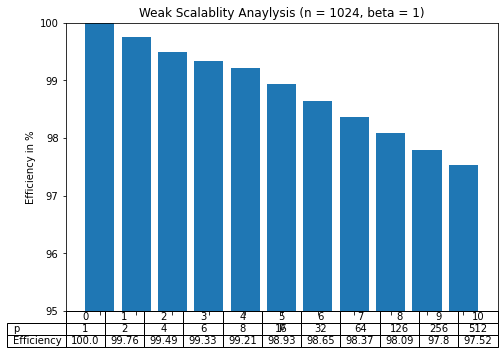

In [24]:
# Efficiency scalability bar plot (for n =104 and comm cost = 0)
import matplotlib.pyplot as plt

ex = [0,1,2,3,4,5,6,7,8,9,10]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(ex, e_list)

ax.set_ylabel("Efficiency in %")
ax.set_ylim(ymin=95)
ax.set_ylim(ymax=100)
ax.set_xlabel("p")
ax.set_title("Weak Scalablity Anaylysis (n = 1024, beta = 1)")
ax.set_xticks(ex)
ax.set_xticklabels([])

row_2 = [round(num, 2) for num in e_list]

# Display 2D table as x-labels
rowLabels = ['p', 'Efficiency']
columnLabels = ('0','1','2','3','4','5','6','7','8','9','10')
row_1 = ['1','2','4','6','8','16','32','64','126','256','512']
#row_2 = ['%0.3g' % (x) for x in speedup_3]
ax.table(cellText = [row_1, row_2], rowLabels = rowLabels, colLabels = columnLabels, loc='bottom', cellLoc='center')